In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [3]:
# Read in Affinity, COVID-19, and GeoID Data
affinity_nat_df = pd.read_csv('Data/Affinity-National-Daily.csv')
affinity_state_df = pd.read_csv('Data/Affinity-State-Daily.csv')
covid_nat_df = pd.read_csv('Data/COVID_Cases-National-Daily.csv')
covid_state_df = pd.read_csv('Data/COVID_Cases-State-Daily.csv')
geoids_df = pd.read_csv('Data/GeoIDs-State.csv')

In [4]:
#affinity_nat_dff.count()
#affinity_state_dff.count()
#covid_nat_df.count()
#covid_state_df.count()
geoids_df.count()

statefips        51
statename        51
stateabbrev      51
state_pop2019    51
dtype: int64

In [5]:
# check data types
geoids_df.dtypes

statefips         int64
statename        object
stateabbrev      object
state_pop2019     int64
dtype: object

In [6]:
affinity_nat_date = pd.to_datetime(affinity_nat_df[['year', 'month', 'day']])
affinity_nat_date

0     2020-01-24
1     2020-01-25
2     2020-01-26
3     2020-01-27
4     2020-01-28
         ...    
162   2020-07-04
163   2020-07-05
164   2020-07-06
165   2020-07-07
166   2020-07-08
Length: 167, dtype: datetime64[ns]

In [7]:
affinity_nat_df["date"] = affinity_nat_date
affinity_nat_df["statefips"] = 0
affinity_nat_df["statename"] = 'National'
affinity_nat_df = affinity_nat_df[ ['date','year','month','day','statefips','statename','spend_acf','spend_aer',
                                   'spend_all','spend_all_inchigh','spend_all_inclow','spend_all_incmiddle','spend_apg',
                                   'spend_grf','spend_hcs','spend_tws'] ]
affinity_nat_df.head()

,date,year,month,day,statefips,statename,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,0,National,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
1,2020-01-25,2020,1,25,0,National,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
2,2020-01-26,2020,1,26,0,National,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
3,2020-01-27,2020,1,27,0,National,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
4,2020-01-28,2020,1,28,0,National,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [8]:
covid_nat_date = pd.to_datetime(covid_nat_df[['year', 'month', 'day']])
covid_nat_date.head()

0   2020-01-21
1   2020-01-22
2   2020-01-23
3   2020-01-24
4   2020-01-25
dtype: datetime64[ns]

In [9]:
# add created date column to covid_nat_df
covid_nat_df["date"] = covid_nat_date
covid_nat_df["statefips"] = 0
covid_nat_df["statename"] = 'National'
covid_nat_df = covid_nat_df[ ['date','year','month','day','statefips','statename','case_rate','new_case_rate'] ]
covid_nat_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate
0,2020-01-21,2020,1,21,0,National,0.000305,.
1,2020-01-22,2020,1,22,0,National,0.000305,.
2,2020-01-23,2020,1,23,0,National,0.000305,.
3,2020-01-24,2020,1,24,0,National,0.000609,.
4,2020-01-25,2020,1,25,0,National,0.000914,.


In [10]:
merge0_df = pd.merge(covid_nat_df, affinity_nat_df, on=["date", "statefips"], how="left")
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,year_y,month_y,...,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,2020,1,22,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,2020,1,23,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,2020,1,24,0,National,0.000609,.,2020.0,1.0,...,-0.00510,-0.0236,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,2020.0,1.0,...,0.00202,-0.0182,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839


In [11]:
merge0_df = merge0_df.dropna(how='any')
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,year_y,month_y,...,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,2020.0,1.0,...,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,2020.0,1.0,...,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,2020.0,1.0,...,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,2020.0,1.0,...,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,2020.0,1.0,...,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [12]:
merge0_df.drop(['year_y', 'month_y', 'day_y','statename_y'], axis=1, inplace=True)
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [13]:
merge0_df = merge0_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day","statename_x": "statename"})
merge0_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [14]:
affinity_state_date = pd.to_datetime(affinity_state_df[['year', 'month', 'day']])
affinity_state_date

0      2020-01-24
1      2020-01-24
2      2020-01-24
3      2020-01-24
4      2020-01-24
          ...    
7441   2020-06-17
7442   2020-06-17
7443   2020-06-17
7444   2020-06-17
7445   2020-06-17
Length: 7446, dtype: datetime64[ns]

In [15]:
affinity_state_df["date"] = affinity_state_date
affinity_state_df = affinity_state_df[ ['date'] + [ col for col in affinity_state_df.columns if col != 'date' ] ]
affinity_state_df

,date,year,month,day,statefips,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,1,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760
1,2020-01-24,2020,1,24,2,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230
2,2020-01-24,2020,1,24,4,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610
3,2020-01-24,2020,1,24,5,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444
4,2020-01-24,2020,1,24,6,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700
7442,2020-06-17,2020,6,17,53,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600
7443,2020-06-17,2020,6,17,54,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200
7444,2020-06-17,2020,6,17,55,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700


In [16]:
covid_state_date = pd.to_datetime(covid_state_df[['year', 'month', 'day']])
covid_state_date

0      2020-01-21
1      2020-01-21
2      2020-01-21
3      2020-01-21
4      2020-01-21
          ...    
8920   2020-07-13
8921   2020-07-13
8922   2020-07-13
8923   2020-07-13
8924   2020-07-13
Length: 8925, dtype: datetime64[ns]

In [17]:
# add created date column to covid_df
covid_state_df["date"] = covid_state_date
covid_state_df = covid_state_df[ ['date'] + [ col for col in covid_state_df.columns if col != 'date' ] ]
covid_state_df

,date,year,month,day,statefips,case_rate,new_case_rate
0,2020-01-21,2020,1,21,1,0.0,.
1,2020-01-21,2020,1,21,2,0.0,.
2,2020-01-21,2020,1,21,4,0.0,.
3,2020-01-21,2020,1,21,5,0.0,.
4,2020-01-21,2020,1,21,6,0.0,.
...,...,...,...,...,...,...,...
8920,2020-07-13,2020,7,13,51,839.0,9.27
8921,2020-07-13,2020,7,13,53,572.0,9.42
8922,2020-07-13,2020,7,13,54,241.0,6.94
8923,2020-07-13,2020,7,13,55,697.0,13


In [18]:
# Merge covid and affinity dataframes
merge1_df = pd.merge(covid_state_df, affinity_state_df, on=["date", "statefips"], how="left")
merge1_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,1,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,2020,1,21,2,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-21,2020,1,21,4,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-21,2020,1,21,5,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-21,2020,1,21,6,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,2020-07-13,2020,7,13,51,839.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8921,2020-07-13,2020,7,13,53,572.0,9.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8922,2020-07-13,2020,7,13,54,241.0,6.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8923,2020-07-13,2020,7,13,55,697.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merge1_df = merge1_df.dropna(how='any')
merge1_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
153,2020-01-24,2020,1,24,1,0.0,.,2020.0,1.0,24.0,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760
154,2020-01-24,2020,1,24,2,0.0,.,2020.0,1.0,24.0,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230
155,2020-01-24,2020,1,24,4,0.0,.,2020.0,1.0,24.0,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610
156,2020-01-24,2020,1,24,5,0.0,.,2020.0,1.0,24.0,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444
157,2020-01-24,2020,1,24,6,0.0,.,2020.0,1.0,24.0,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,2020-06-17,2020,6,17,51,653.0,6.02,2020.0,6.0,17.0,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700
7595,2020-06-17,2020,6,17,53,371.0,4.37,2020.0,6.0,17.0,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600
7596,2020-06-17,2020,6,17,54,133.0,1.46,2020.0,6.0,17.0,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200
7597,2020-06-17,2020,6,17,55,449.0,5.09,2020.0,6.0,17.0,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700


In [20]:
merge2_df = pd.merge(merge1_df, geoids_df, on="statefips", how="left")

merge2_df.drop(['year_y', 'month_y', 'day_y'], axis=1, inplace=True)

merge2_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473,California,CA,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,653.0,6.02,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700,Virginia,VA,8535519
7442,2020-06-17,2020,6,17,53,371.0,4.37,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600,Washington,WA,7614893
7443,2020-06-17,2020,6,17,54,133.0,1.46,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200,West Virginia,WV,1792147
7444,2020-06-17,2020,6,17,55,449.0,5.09,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700,Wisconsin,WI,5822434


In [21]:
merge2_df = merge2_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day"})
merge2_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473,California,CA,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,653.0,6.02,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700,Virginia,VA,8535519
7442,2020-06-17,2020,6,17,53,371.0,4.37,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600,Washington,WA,7614893
7443,2020-06-17,2020,6,17,54,133.0,1.46,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200,West Virginia,WV,1792147
7444,2020-06-17,2020,6,17,55,449.0,5.09,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700,Wisconsin,WI,5822434


In [22]:
nat_state_append_df = merge0_df.append(merge2_df, sort=False).reset_index()
del nat_state_append_df['index']
nat_state_append_df

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.00579,-0.00752,-0.00654,-0.00952,-0.00954,-0.003280,-0.005840,NaN,NaN
1,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.004690,0.000839,NaN,NaN
2,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.006470,0.002720,NaN,NaN
3,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011,-0.0159,-0.01190,-0.00671,-0.00980,-0.007550,-0.015700,NaN,NaN
4,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.0133,-0.0163,-0.01320,-0.00492,-0.01820,-0.002430,-0.009870,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,2020-06-17,2020,6,17,51,Virginia,653.000000,6.02,-0.38000,-0.44500,-0.096800,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.537000,VA,8535519.0
7609,2020-06-17,2020,6,17,53,Washington,371.000000,4.37,-0.45200,-0.44700,-0.131000,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.496000,WA,7614893.0
7610,2020-06-17,2020,6,17,54,West Virginia,133.000000,1.46,-0.24300,-0.55300,0.004790,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.362000,WV,1792147.0
7611,2020-06-17,2020,6,17,55,Wisconsin,449.000000,5.09,-0.37500,-0.42500,-0.091700,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.447000,WI,5822434.0


In [23]:
no_nat_df = nat_state_append_df[nat_state_append_df['statename'] != 'National']
no_nat_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
167,2020-01-24,2020,1,24,1,Alabama,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760,AL,4903185.0
168,2020-01-24,2020,1,24,2,Alaska,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230,AK,731545.0
169,2020-01-24,2020,1,24,4,Arizona,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610,AZ,7278717.0
170,2020-01-24,2020,1,24,5,Arkansas,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444,AR,3017804.0
171,2020-01-24,2020,1,24,6,California,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473,CA,39512223.0


In [24]:
# Filter for data as of Jun 17th and sort by descening order
jun17_df = no_nat_df[no_nat_df['date'] == '2020-06-17'].sort_values('case_rate',ascending = False)
jun17_df.head()                                                                                                   

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
7594,2020-06-17,2020,6,17,36,New York,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.217,-0.491,NY,19453561.0
7592,2020-06-17,2020,6,17,34,New Jersey,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.168,-0.525,NJ,8882190.0
7583,2020-06-17,2020,6,17,25,Massachusetts,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.243,-0.520,MA,6892503.0
7601,2020-06-17,2020,6,17,44,Rhode Island,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.216,-0.552,RI,1059361.0
7570,2020-06-17,2020,6,17,11,District Of Columbia,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.224,-0.760,DC,705749.0


In [25]:
# Select top 5 states 
jun17_top5=jun17_df.iloc[0:5]
jun17_top5_df=pd.DataFrame(jun17_top5)
jun17_top5_df

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
7594,2020-06-17,2020,6,17,36,New York,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.217,-0.491,NY,19453561.0
7592,2020-06-17,2020,6,17,34,New Jersey,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.168,-0.525,NJ,8882190.0
7583,2020-06-17,2020,6,17,25,Massachusetts,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.243,-0.520,MA,6892503.0
7601,2020-06-17,2020,6,17,44,Rhode Island,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.216,-0.552,RI,1059361.0
7570,2020-06-17,2020,6,17,11,District Of Columbia,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.224,-0.760,DC,705749.0


In [26]:
top5_list = jun17_top5_df["statename"].tolist()
top5_list

['New York',
 'New Jersey',
 'Massachusetts',
 'Rhode Island',
 'District Of Columbia']

In [27]:
top5_df = nat_state_append_df[nat_state_append_df['statename'].isin(top5_list)]
top5_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
175,2020-01-24,2020,1,24,11,District Of Columbia,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,DC,705749.0
188,2020-01-24,2020,1,24,25,Massachusetts,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,MA,6892503.0
197,2020-01-24,2020,1,24,34,New Jersey,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,NJ,8882190.0
199,2020-01-24,2020,1,24,36,New York,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,NY,19453561.0
206,2020-01-24,2020,1,24,44,Rhode Island,0.0,.,0.04200,1.06000,-0.01900,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,RI,1059361.0


In [28]:
nat_df = nat_state_append_df[nat_state_append_df['statename'] == 'National']
nat_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.00579,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840,NaN,NaN
1,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839,NaN,NaN
2,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720,NaN,NaN
3,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011,-0.0159,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700,NaN,NaN
4,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.0133,-0.0163,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870,NaN,NaN


In [29]:
fla_df = nat_state_append_df[nat_state_append_df["statename"] == "Florida"]
fla_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
176,2020-01-24,2020,1,24,12,Florida,0.0,.,-0.01970,-0.043800,-0.01450,-0.0133,-0.0249,-0.01070,-0.009640,-0.011000,-0.01860,-0.005690,FL,21477737.0
227,2020-01-25,2020,1,25,12,Florida,0.0,.,-0.01650,-0.024700,-0.01250,-0.0118,-0.0215,-0.00917,-0.007020,-0.009390,-0.01840,-0.004130,FL,21477737.0
278,2020-01-26,2020,1,26,12,Florida,0.0,.,-0.01590,-0.020300,-0.00959,-0.00767,-0.0176,-0.00700,-0.000504,-0.000045,-0.01510,0.000966,FL,21477737.0
329,2020-01-27,2020,1,27,12,Florida,0.0,0,-0.00283,0.000203,-0.00378,-0.00858,-0.0147,0.00170,0.019700,0.014200,-0.01170,-0.008940,FL,21477737.0
380,2020-01-28,2020,1,28,12,Florida,0.0,0,0.00319,0.001730,-0.00160,-0.0105,-0.00789,0.00315,0.013400,0.006050,0.00849,-0.010300,FL,21477737.0


In [30]:
top5_nat_fla_df = top5_df.append([nat_df, fla_df], sort=False).reset_index()
del top5_nat_fla_df['index']
top5_nat_fla_df.head(10)

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,11,District Of Columbia,0.0,.,-0.00066,0.00528,-0.002520,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,DC,705749.0
1,2020-01-24,2020,1,24,25,Massachusetts,0.0,.,0.02580,-0.04450,-0.003580,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,MA,6892503.0
2,2020-01-24,2020,1,24,34,New Jersey,0.0,.,-0.00736,0.01600,-0.005480,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,NJ,8882190.0
3,2020-01-24,2020,1,24,36,New York,0.0,.,0.00214,-0.03430,-0.006100,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,NY,19453561.0
4,2020-01-24,2020,1,24,44,Rhode Island,0.0,.,0.04200,1.06000,-0.019000,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,RI,1059361.0
5,2020-01-25,2020,1,25,11,District Of Columbia,0.0,.,0.01610,-0.03950,0.010100,0.0152,-0.0229,0.00903,-0.05280,-0.00207,0.1430,-0.00294,DC,705749.0
6,2020-01-25,2020,1,25,25,Massachusetts,0.0,.,0.03650,-0.06670,0.013100,0.00728,-0.02,0.02790,0.04110,0.02130,0.0584,-0.01100,MA,6892503.0
7,2020-01-25,2020,1,25,34,New Jersey,0.0,.,0.01010,0.03110,0.000211,-0.00178,0.00933,0.00163,-0.00344,-0.01180,-0.0286,0.00314,NJ,8882190.0
8,2020-01-25,2020,1,25,36,New York,0.0,.,0.03200,0.00458,0.011800,0.00774,0.0223,0.01480,0.01920,0.02380,-0.0194,0.07810,NY,19453561.0
9,2020-01-25,2020,1,25,44,Rhode Island,0.0,.,0.04910,1.04000,0.005850,0.0278,-0.0778,0.01410,0.06870,-0.03600,0.2000,-0.03400,RI,1059361.0


# Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the percentage of change in spending

mean = top5_nat_fla_df.groupby('statename')['spend_all'].mean()
median = top5_nat_fla_df.groupby('statename')['spend_all'].median()
variance = top5_nat_fla_df.groupby('statename')['spend_all'].var()
stdv = top5_nat_fla_df.groupby('statename')['spend_all'].std()
sem = top5_nat_fla_df.groupby('statename')['spend_all'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Standard Deviation": stdv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
statename,,,,,
District Of Columbia,-0.196942,-0.26650,0.022849,0.151158,0.012510
Florida,-0.097488,-0.07905,0.007665,0.087550,0.007246
Massachusetts,-0.135034,-0.12450,0.015233,0.123422,0.010214
National,-0.116990,-0.10000,0.011018,0.104967,0.008123
New Jersey,-0.128106,-0.12100,0.013503,0.116200,0.009617
New York,-0.145591,-0.14700,0.013735,0.117196,0.009699
Rhode Island,-0.239449,-0.27300,0.022714,0.150711,0.012473


# Line Chart

In [32]:
# Code to select End-Of_Month data
# eom_list = ['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-17']
# eom_df = top3_nat_fla_df[top3_nat_fla_df['date'].isin(eom_list)]
# eom_df.head()



top5_nat_fla_df_daterange = top5_nat_fla_df[(top5_nat_fla_df['date'] > '2020-01-23') & (top5_nat_fla_df['date'] <= '2020-06-17')]
top5_nat_fla_df_daterange.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,11,District Of Columbia,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,DC,705749.0
1,2020-01-24,2020,1,24,25,Massachusetts,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,MA,6892503.0
2,2020-01-24,2020,1,24,34,New Jersey,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,NJ,8882190.0
3,2020-01-24,2020,1,24,36,New York,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,NY,19453561.0
4,2020-01-24,2020,1,24,44,Rhode Island,0.0,.,0.04200,1.06000,-0.01900,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,RI,1059361.0


In [33]:
# Select the columns needed to create the line plot
line_plot_df = top5_nat_fla_df_daterange[["date", "statename","spend_all"]]
line_plot_df.head()

,date,statename,spend_all
0,2020-01-24,District Of Columbia,-0.00252
1,2020-01-24,Massachusetts,-0.00358
2,2020-01-24,New Jersey,-0.00548
3,2020-01-24,New York,-0.00610
4,2020-01-24,Rhode Island,-0.01900


In [34]:
# Set the 'statename' to be the index for easy referencing of rows
line_plot_df = line_plot_df.set_index("statename")

In [35]:
# Create a list of the dates to use for the x axis
dates = line_plot_df["date"].unique()

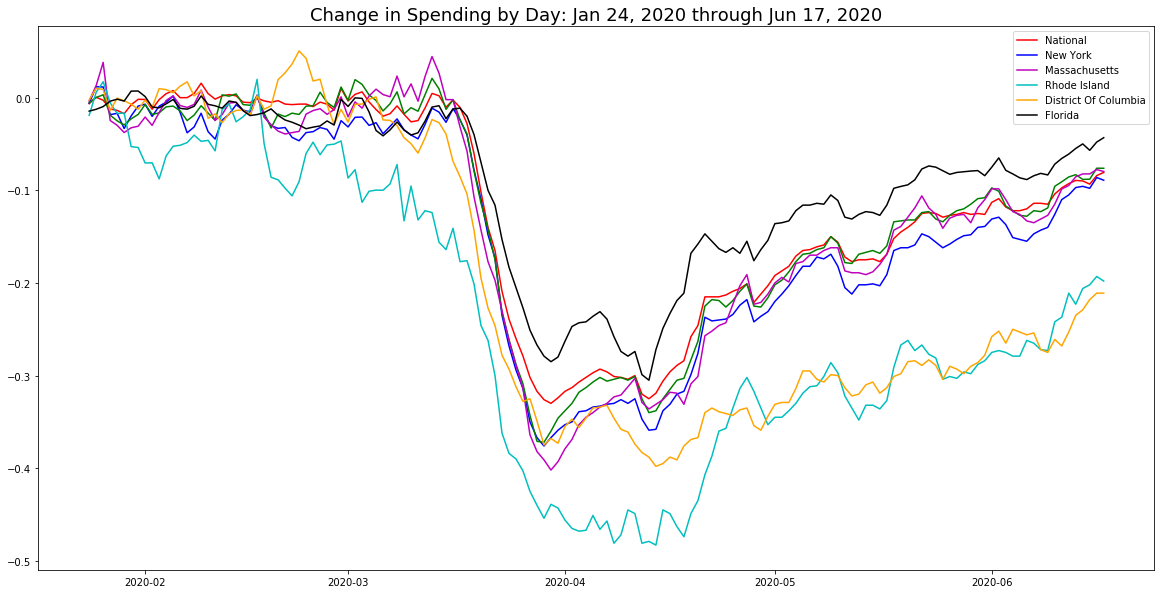

In [36]:
# Set line chart size
plt.figure(figsize=(20,10))

# Plot the the national, each state in the top 5, and fla numbers
nat, = plt.plot(dates, line_plot_df.loc['National',["spend_all"]], 
                color="r",label='National')

ny, = plt.plot(dates, line_plot_df.loc['New York',["spend_all"]], 
               color="b",label='New York')

nj, = plt.plot(dates, line_plot_df.loc['New Jersey',["spend_all"]], 
               color="g",label='New Jersey')

mass, = plt.plot(dates, line_plot_df.loc['Massachusetts',["spend_all"]], 
                 color="m",label='Massachusetts')

ri, = plt.plot(dates, line_plot_df.loc['Rhode Island',["spend_all"]], 
               color="c",label='Rhode Island')

doc, = plt.plot(dates, line_plot_df.loc['District Of Columbia',["spend_all"]], 
                color="orange",label='District Of Columbia')

fla, = plt.plot(dates, line_plot_df.loc['Florida',["spend_all"]], 
                color="k",label='Florida')

# Set a title for the chart
plt.title("Change in Spending by Day: Jan 24, 2020 through Jun 17, 2020", fontsize=18)    
    
# Create a legend for our chart
plt.legend(handles=[nat, ny, mass, ri, doc, fla], loc="best")

# Show the chart
plt.show()

# Bar chart with national target line

In [37]:
date_filter = nat_state_append_df[nat_state_append_df["date"] == "2020-06-17"]
reduced_df = date_filter[['statename','spend_all']]
flitered_df = reduced_df[reduced_df['statename'].isin(['National','New York','New Jersey','Massachusetts','Florida','Rhode Island', 'District Of Columbia'])]
flitered_df = flitered_df.rename(columns={"spend_all": "Spending"})
flitered_df

,statename,Spending
145,National,-0.0807
7570,District Of Columbia,-0.2110
7571,Florida,-0.0432
7583,Massachusetts,-0.0797
7592,New Jersey,-0.0762
7594,New York,-0.0891
7601,Rhode Island,-0.1980


C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<function matplotlib.pyplot.show(*args, **kw)>

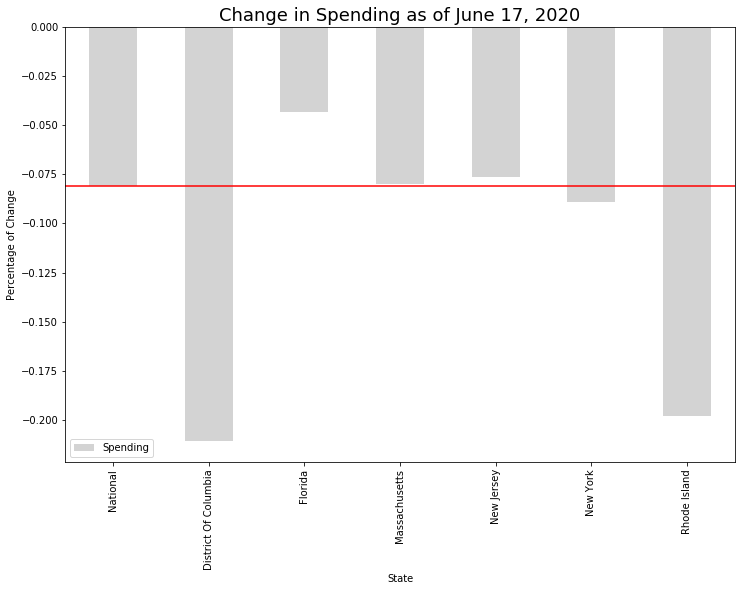

In [38]:
# Plot the world average as a bar chart
flitered_df[['statename', 'Spending']].plot(x='statename', color='lightgray', kind='bar', figsize=(12,8))

# Set plot title
plt.title("Change in Spending as of June 17, 2020", fontsize=18)  

# Set x abdy axis titles
ax1 = plt.axes()
ax1.xaxis.set_label_text('State')
ax1.yaxis.set_label_text('Percentage of Change')

# Set National percentage of change, as of June 17, as target line
national = -0.0807
ax1.axhline(national, color="r")

# Plot bar chart
plt.show

# Income Class Spending Line Chart

In [39]:
# 
nat_df_daterange = nat_df[(nat_df['date'] >= '2020-01-24') & (nat_df['date'] <= '2020-06-17')]
nat_df_daterange.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.00579,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840,NaN,NaN
1,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839,NaN,NaN
2,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720,NaN,NaN
3,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011,-0.0159,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700,NaN,NaN
4,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.0133,-0.0163,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870,NaN,NaN


In [40]:
# Select the columns needed to create the line plot
nat_incclass_plot_df = nat_df_daterange[["date", "case_rate","spend_all" ,"spend_all_inchigh","spend_all_incmiddle","spend_all_inclow"]]
nat_incclass_plot_df.head()

,date,case_rate,spend_all,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
0,2020-01-24,0.000609,-0.006440,-0.00579,-0.00654,-0.00752
1,2020-01-25,0.000914,0.000432,-0.000625,0.00199,-0.00201
2,2020-01-26,0.001520,-0.002710,-0.000425,-0.00315,-0.00668
3,2020-01-27,0.001520,-0.012200,-0.011,-0.01190,-0.0159
4,2020-01-28,0.001520,-0.013700,-0.0133,-0.01320,-0.0163


In [41]:
# Set the 'statename' to be the index for easy referencing of rows
nat_incclass_plot_df = nat_incclass_plot_df.set_index("date")


In [42]:
# Create a list of the dates to use for the x axis
dates = nat_df_daterange['date'].unique()


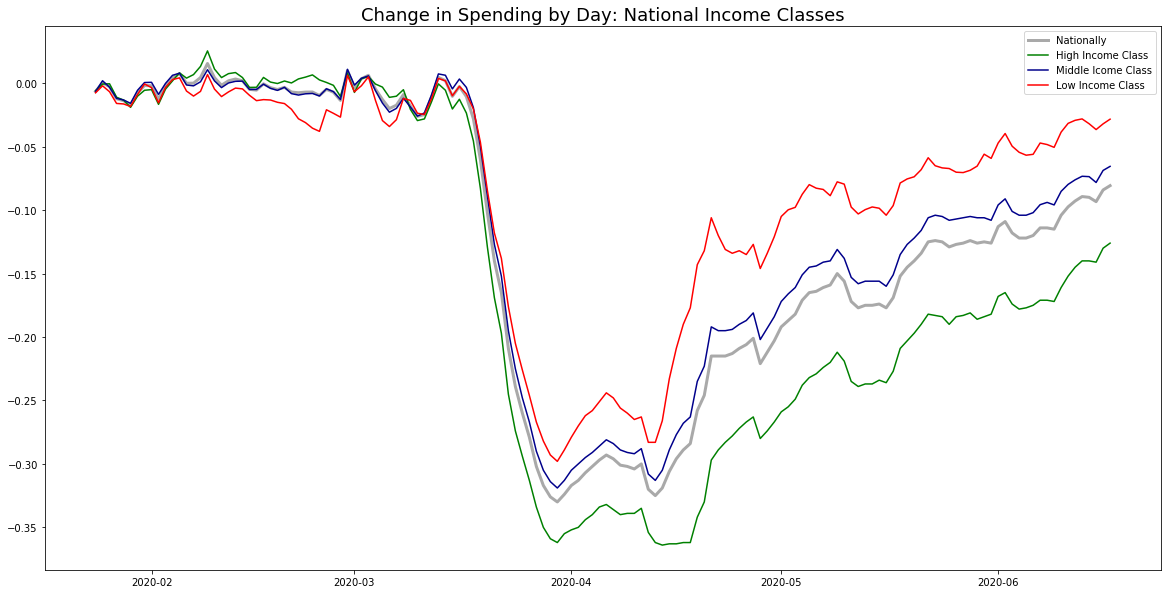

In [43]:
# Set line chart size
plt.figure(figsize=(20,10))

# Plot the national income classes
nat, = plt.plot(dates, nat_incclass_plot_df.loc[:,["spend_all"]], 
                color="darkgray",label='Nationally', linewidth=3.0)

high, = plt.plot(dates, nat_incclass_plot_df.loc[:,["spend_all_inchigh"]], 
                color="g",label='High Income Class')

middle, = plt.plot(dates, nat_incclass_plot_df.loc[:,["spend_all_incmiddle"]], 
               color="darkblue",label='Middle Icome Class')

low, = plt.plot(dates, nat_incclass_plot_df.loc[:,["spend_all_inclow"]], 
               color="r",label='Low Income Class')

# Set a title for the chart
plt.title("Change in Spending by Day: National Income Classes", fontsize=18)    
    
# Create a legend for our chart
plt.legend(handles=[nat, high, middle, low], loc="best")

# Show the chart
plt.show()


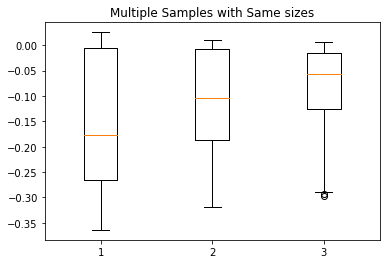

In [44]:
# Generate a box plot of the spending across income classes to determine outliers
inc_class_spend = [nat_incclass_plot_df['spend_all_inchigh'], nat_incclass_plot_df['spend_all_incmiddle'], nat_incclass_plot_df['spend_all_inclow']]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Same sizes')
ax7.boxplot(inc_class_spend)
plt.show()

The correlation between both factors is 1.0


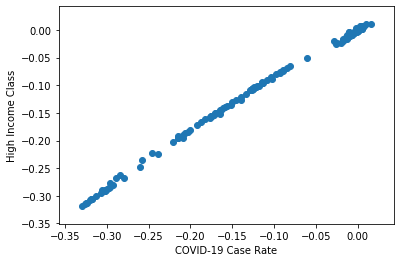

In [45]:
# High Income Correlation
cases = nat_incclass_plot_df.iloc[:,1]
highinc = nat_incclass_plot_df.iloc[:,3]
correlation = sts.pearsonr(cases,highinc)
plt.scatter(cases,highinc)
plt.xlabel('COVID-19 Case Rate')
plt.ylabel('High Income Class')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.95


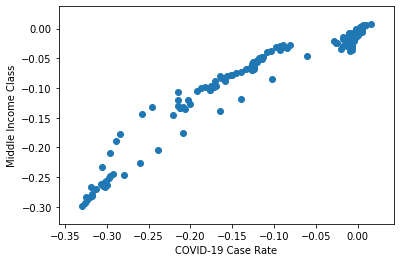

In [46]:
# Middle Income Correlation
cases = nat_incclass_plot_df.iloc[:,1]
midinc = nat_incclass_plot_df.iloc[:,4]
correlation = sts.pearsonr(cases,midinc)
plt.scatter(cases,midinc)
plt.xlabel('COVID-19 Case Rate')
plt.ylabel('Middle Income Class')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [47]:
# Low Income Correlation
cases = nat_incclass_plot_df.iloc[:,1]
lowinc = nat_incclass_plot_df.iloc[:,5]
correlation = sts.pearsonr(cases,lowinc)
plt.scatter(cases,lowinc)
plt.xlabel('COVID-19 Case Rate')
plt.ylabel('Low Income Class')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

IndexError: single positional indexer is out-of-bounds